## Linear Regression: Understanding the data MPG - Part 1

What is Linear regression 

Definition: 
Linear regression is one of the most fundamental models in statistics and machine learning. It is used to model the relationship between a dependent variable (also called the response or target) and one or more independent variables (or features). The goal is to fit a linear equation that best describes how the dependent variable changes in response to the independent variable(s).

TLDR: Finding the relationship between on variable and how it impacts other variables (in ML its called a feature). Then you use math do describe the response.

Still TLDR: Just like what we did above, but using math :-)

## Load and Explore the Dataset

In [ ]:
#do everything we did before:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# loading the dataset
df = sns.load_dataset("mpg")
# clean the dataset
df.drop(["name"], axis = 1, inplace = True) #drop the name of the car as it is not needed
#drop all null values
df.dropna(inplace = True) 
#use integer encoding to change the origen column to a number
df["origin"] = df["origin"].astype('category')
origin_mapping = dict(enumerate(df['origin'].cat.categories)) #save the map for later if needed
df['origin'] = df['origin'].cat.codes



In [2]:
print(df.sort_values("mpg").head())
df.cylinders.unique() # show the unique values of the cylinders
df.cylinders.value_counts() #show the counts

     mpg  cylinders  displacement  horsepower  weight  acceleration  \
28   9.0          8         304.0       193.0    4732          18.5   
25  10.0          8         360.0       215.0    4615          14.0   
26  10.0          8         307.0       200.0    4376          15.0   
67  11.0          8         429.0       208.0    4633          11.0   
27  11.0          8         318.0       210.0    4382          13.5   

    model_year  origin  
28          70       2  
25          70       2  
26          70       2  
67          72       2  
27          70       2  


cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

## Lets first do some more Visualizations : Distribution 

Understanding the shape of variable distributions helps identify outliers, skewness, and variable scaling.
This allows us to ensure when we model the data we reduce issues that could affect model performance.

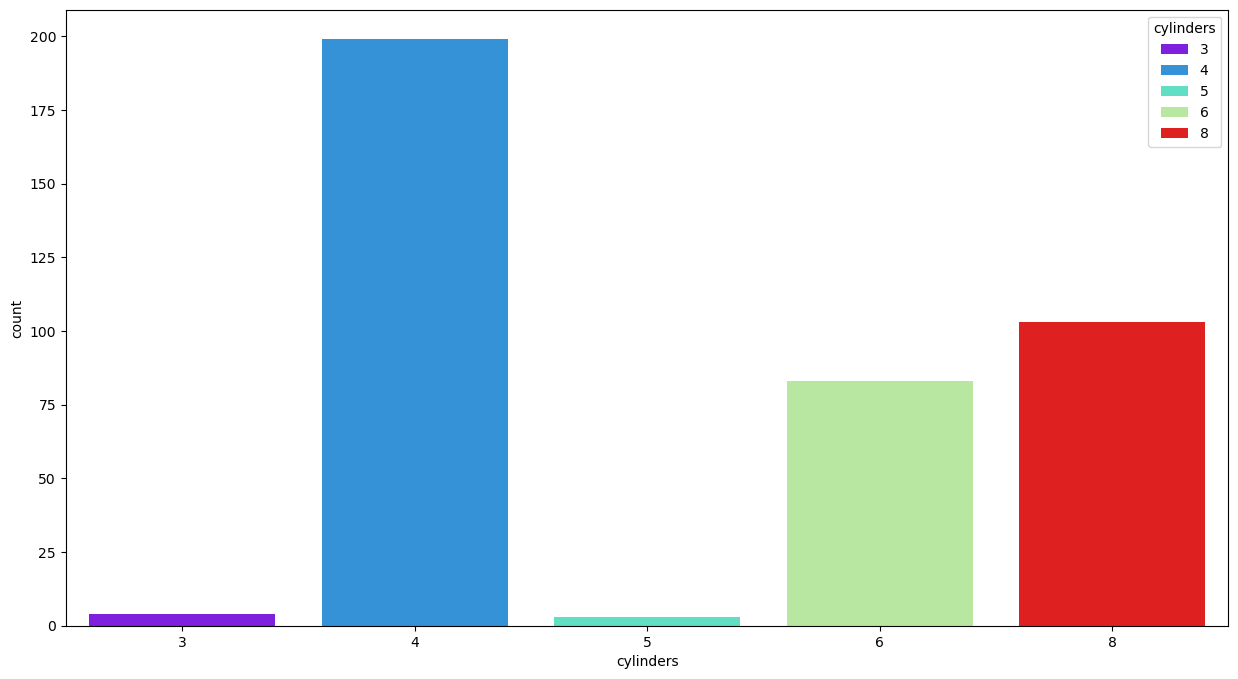

In [4]:
plt.figure(figsize = (15, 8))
sns.countplot(x=df["cylinders"], data = df, palette = "rainbow", hue = "cylinders")
plt.show()

    Quick note: countplot helps us see how the cars are distributed based on their number of cylinders.


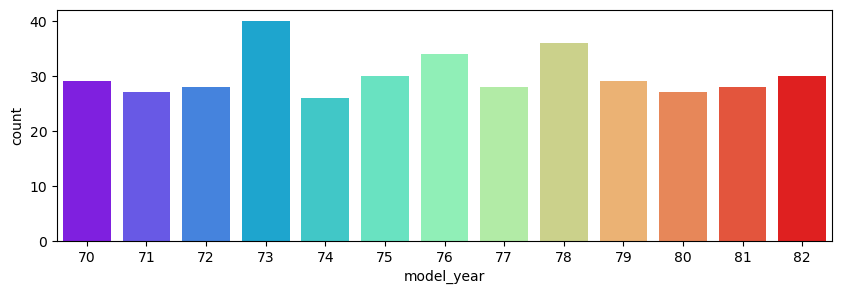

In [5]:
plt.figure(figsize = (10, 3))
sns.countplot(x = df["model_year"], data = df, palette = "rainbow", hue = "model_year",legend=False)
plt.show()

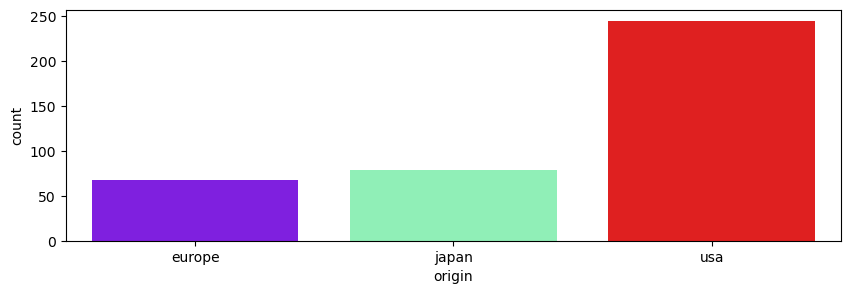

In [6]:
plt.figure(figsize = (10, 3))
sns.countplot(x=df["origin"], data = df, palette = "rainbow", hue = "origin",legend=False)
plt.xticks(ticks=[0, 1, 2], labels=origin_mapping.values())
plt.show()

## Create a histogram to see how fuel efficiency (MPG) is distributed across all cars
KDE is a way of estimating the probability distribution of a variable. It is a smooth alternative to histograms and is often used in exploratory data analysis.
`kde=True` adds the smooth curve.

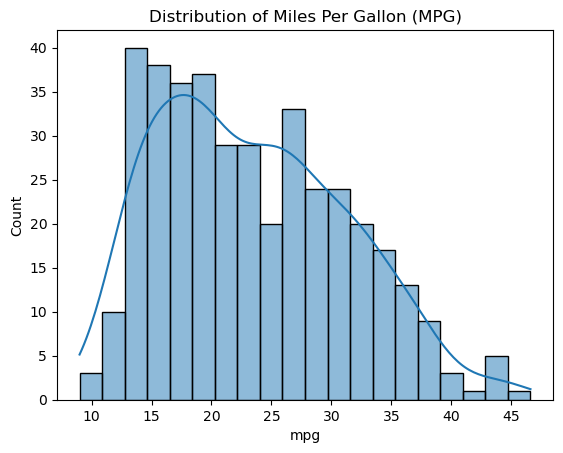

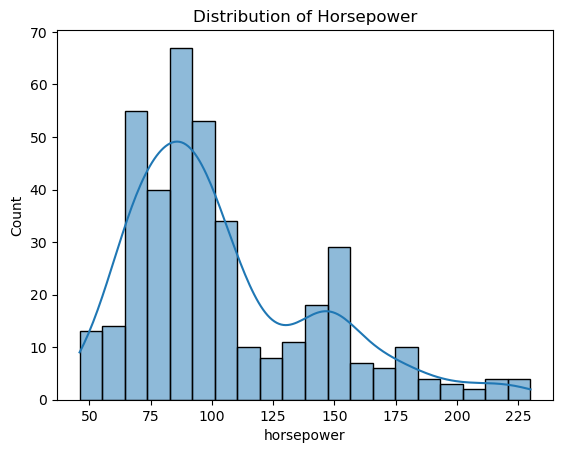

In [7]:

# Distribution of target variable
sns.histplot(df["mpg"], kde=True, bins=20)
plt.title("Distribution of Miles Per Gallon (MPG)")
plt.show()

# Distribution of key feature
sns.histplot(df["horsepower"], kde=True, bins=20)
plt.title("Distribution of Horsepower")
plt.show()


# Exploratory Data Analysis (EDA)

EDA provides insight into relationships between features. Strong linear correlations (positive or negative) make good candidates for linear regression.

TLDR: we are able to view the correlation using plots.


EDA is the critical first step in any statistical or machine learning workflow.
Using the following code we can identify if our data fits a linear model. 
the following graphs show `horsepower`, `weight`, `displacement` using both pairplots and correlation matrices.


Note:
a pairplot use scatterplots to visually inspect relationships between each feature(`horsepower`, `weight`, `displacement`)  and the target.

<Figure size 1000x500 with 0 Axes>

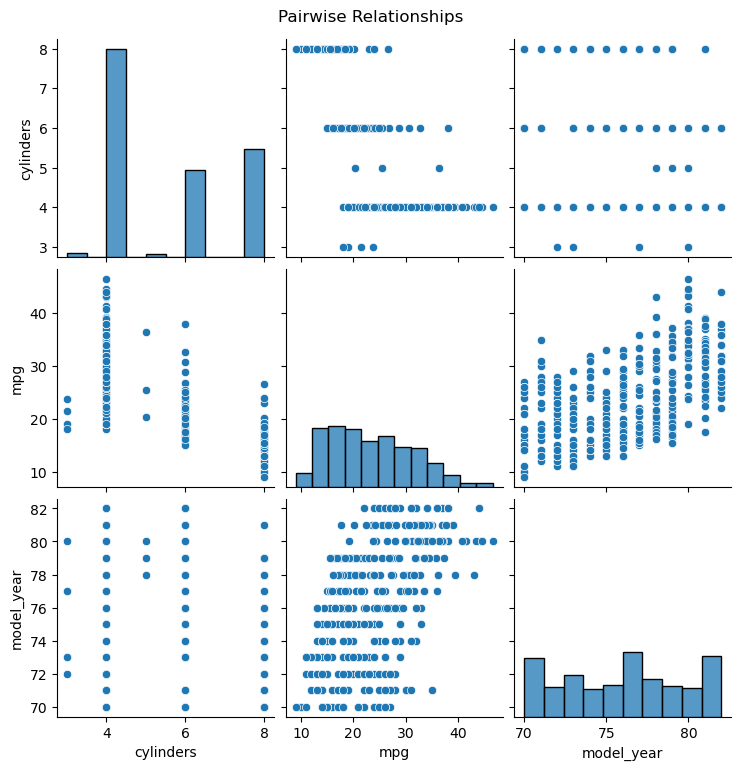

In [27]:
# poorly distributed data
plt.figure(figsize = (10, 5))
sns.pairplot(df[[ "cylinders", "mpg","model_year"]])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

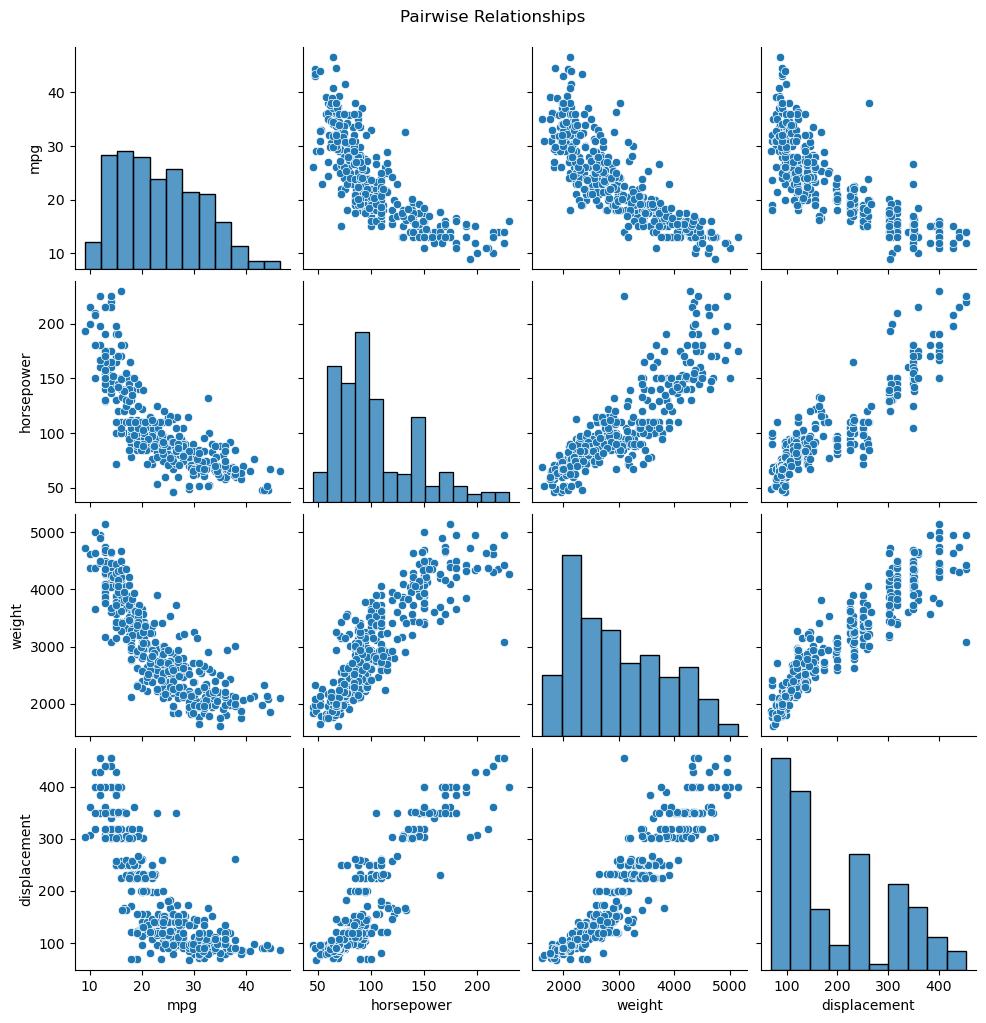

In [9]:
sns.pairplot(df[["mpg", "horsepower", "weight", "displacement"]])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


What do you observe?
- Is there a downward trend between mpg and weight?
- Do heavier cars tend to have higher displacement?

In [51]:

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

ValueError: could not convert string to float: 'usa'

<Figure size 1000x600 with 0 Axes>

Reminders: 
Correlation values range from -1 (strong negative) to +1 (strong positive)

`annot=True` writes the number in each cell

`cmap` changes the color palette for easier reading

## Bivariate Analysis or Boxplot

Boxplots display:
- Median (center line)
- Interquartile range (box)
- Possible outliers (dots)

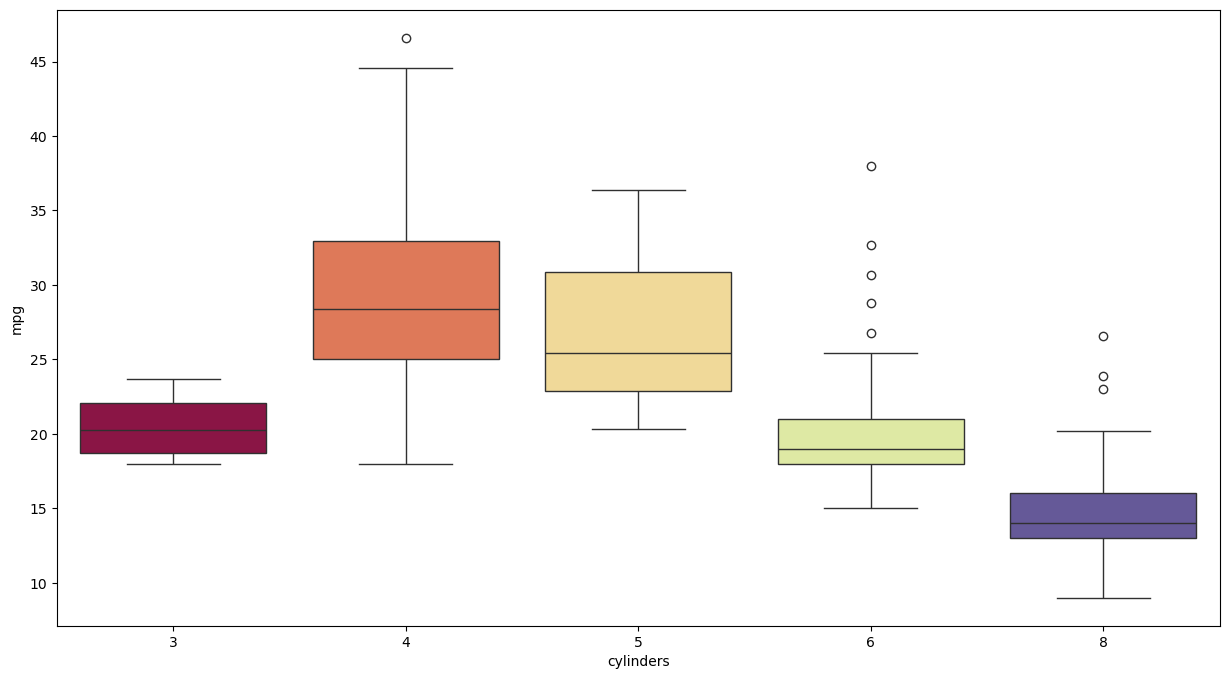

In [15]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = "cylinders", y = "mpg", data = df, palette = "Spectral", hue = "cylinders", legend=False)
plt.show()

    What do you observe in this data?

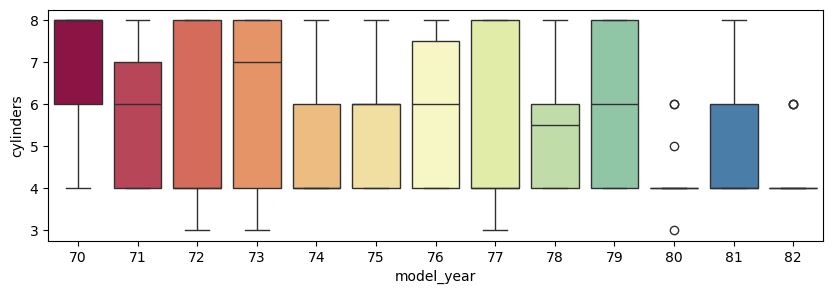

In [25]:
plt.figure(figsize = (10, 3))
sns.boxplot(x = "model_year", y = "cylinders", data = df, palette = "Spectral", hue = "model_year", legend=False)
plt.show()

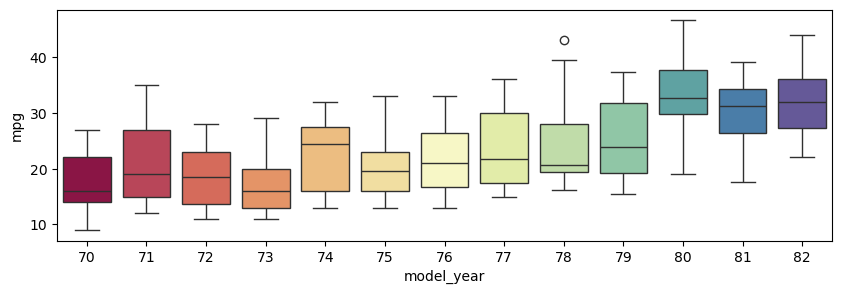

In [26]:
plt.figure(figsize = (10, 3))
sns.boxplot(x = "model_year", y = "mpg", data = df, palette = "Spectral", hue = "model_year", legend=False)
plt.show()

## Multivariate Visual Analysis: 

Before we apply any statistical model like linear regression, it's important to develop a visual understanding of how different features effect eachother. 

### Horsepower vs MPG

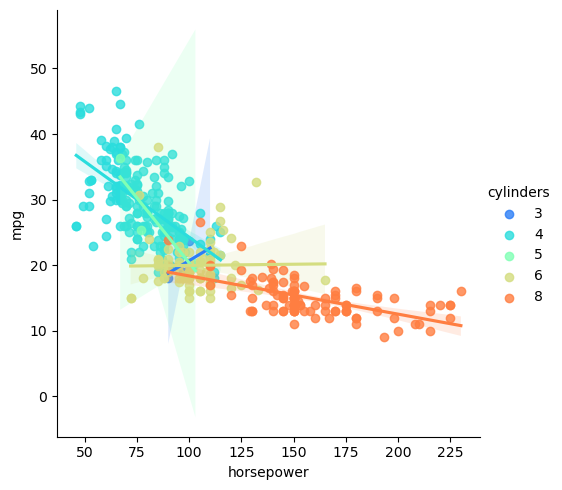

In [52]:
df["origin_label"] = df["origin"].map(origin_mapping) #creating a new column with the labels for easier plotting
graph = sns.lmplot(x = "horsepower", y = "mpg", hue = "cylinders", data = df, palette = "rainbow")
plt.show()

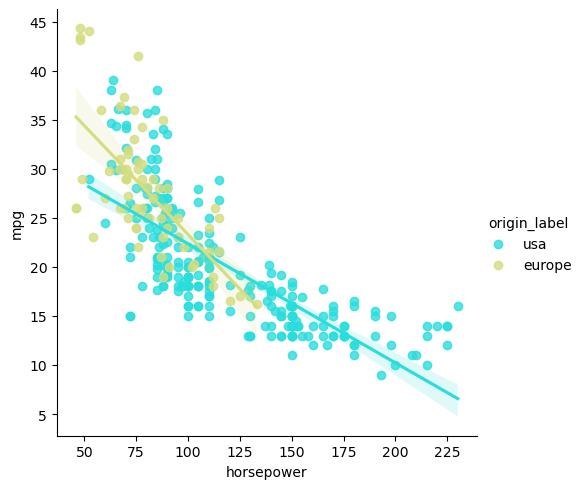

In [55]:
graph = sns.lmplot(x = "horsepower", y = "mpg", hue = "origin_label", data = df[df["origin"].isin([0, 2])], palette = "rainbow")
plt.show()

### Acceleration vs MPG

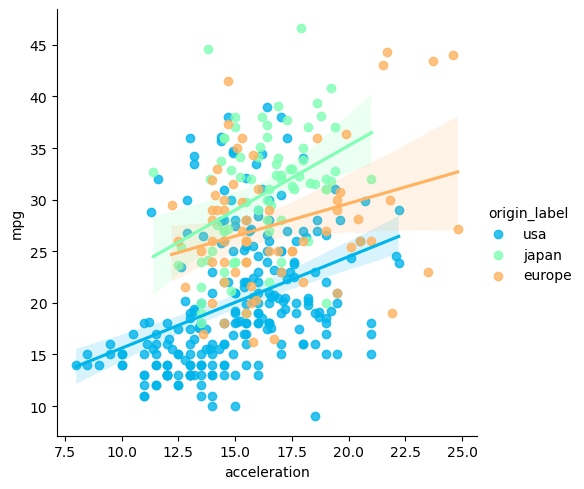

In [56]:
graph = sns.lmplot(x = "acceleration", y = "mpg", hue = "origin_label", data = df, palette = "rainbow")
plt.show()

### Weight vs MPG

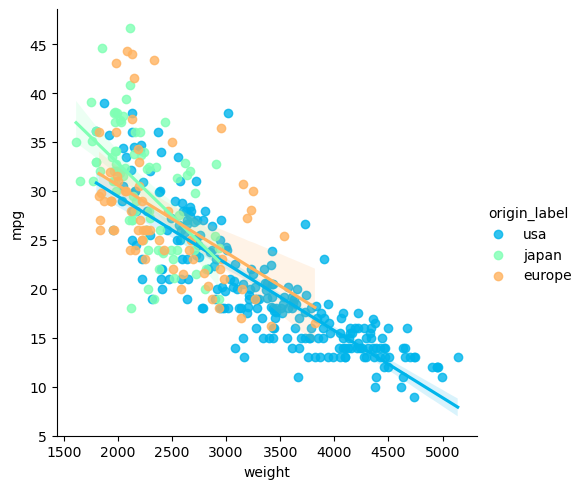

In [57]:
graph = sns.lmplot(x = "weight", y = "mpg", hue = "origin_label", data = df, palette = "rainbow")
plt.show()

### Displacement vs MPG

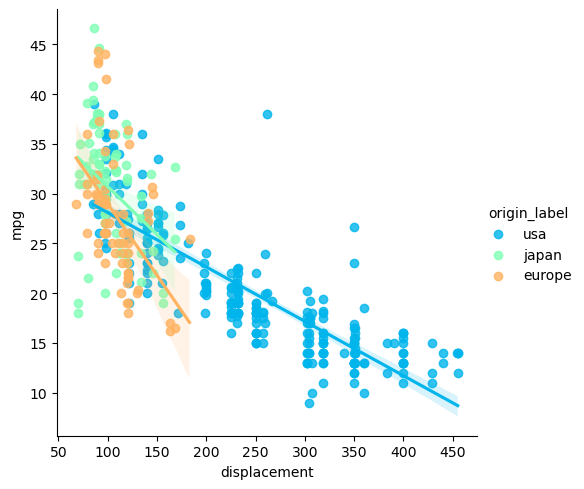

In [58]:
graph = sns.lmplot(x = "displacement", y = "mpg", hue = "origin_label", data = df, palette = "rainbow")
plt.show()